In [1]:
## Digits

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from gympy.layers import Linear, Relu, Sigmoid, Softmax, Tanh
from gympy.networks import NeuralNetwork, DataSet
from gympy.optimizers import RMSprop
from gympy.loss import CategoricalCrossEntropy
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
digits = load_digits()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)
X_train.shape

(1347, 64)

In [5]:
Y = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1,1)).T
Y.shape

(10, 1347)

In [6]:
X = StandardScaler().fit_transform(X_train).T
print(X.shape)


(64, 1347)


In [7]:

n_iter=390
model = NeuralNetwork(
    layers = [
        Tanh(n_input=64, n_output=32, dropout_rate=0.0),
        Softmax(n_input=32, n_output=10)
    ],
    optimizer = RMSprop(learning_rate=1e-2,momentum=0.9),
    loss = CategoricalCrossEntropy(),
    n_iter=n_iter
)

In [8]:
tt = model.forward(X[:,0:1])
tt

array([[0.09785614],
       [0.10108333],
       [0.10242167],
       [0.10164505],
       [0.09968057],
       [0.09977369],
       [0.09970874],
       [0.09833634],
       [0.0996076 ],
       [0.09988688]])

In [9]:
yy = Y[:,0:1]
yy

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [10]:
np.log(0.5)

-0.6931471805599453

In [11]:
CategoricalCrossEntropy().forward(tt, Y[:,0:1])

2.3193616578497247

In [12]:

dataset = DataSet(
    x = X,
    y = Y,
    batch_size=64
)


In [13]:
for i in model.get_bias():
    print(i.shape)

(32, 1)
(10, 1)


0 cost 0.294863655187921
100 cost 5.063433747535177e-09
200 cost 2.20216512081244e-09
300 cost 1.4089042609994192e-09
400 cost 1.0358495455293427e-09


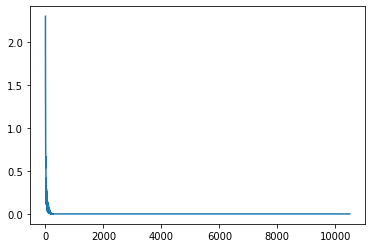

In [14]:
n_iter=5000
model.train_dataset(dataset, show=100, n_epochs=500)
plt.plot(model.cost)

In [15]:
model.forward(X[:,[453]])

array([[8.12261131e-15],
       [1.49678137e-13],
       [8.08470901e-17],
       [1.03435016e-19],
       [9.99999994e-01],
       [1.57136858e-19],
       [7.83034561e-10],
       [5.31621186e-09],
       [1.48293406e-11],
       [8.63736381e-21]])

In [16]:
test_idx = np.random.choice(X.shape[1],16, replace=False)

In [17]:
prob = model.forward(X[:,test_idx])
pred = np.argmax(prob,axis=0)

true_vals = np.argmax(Y[:,test_idx], axis=0)

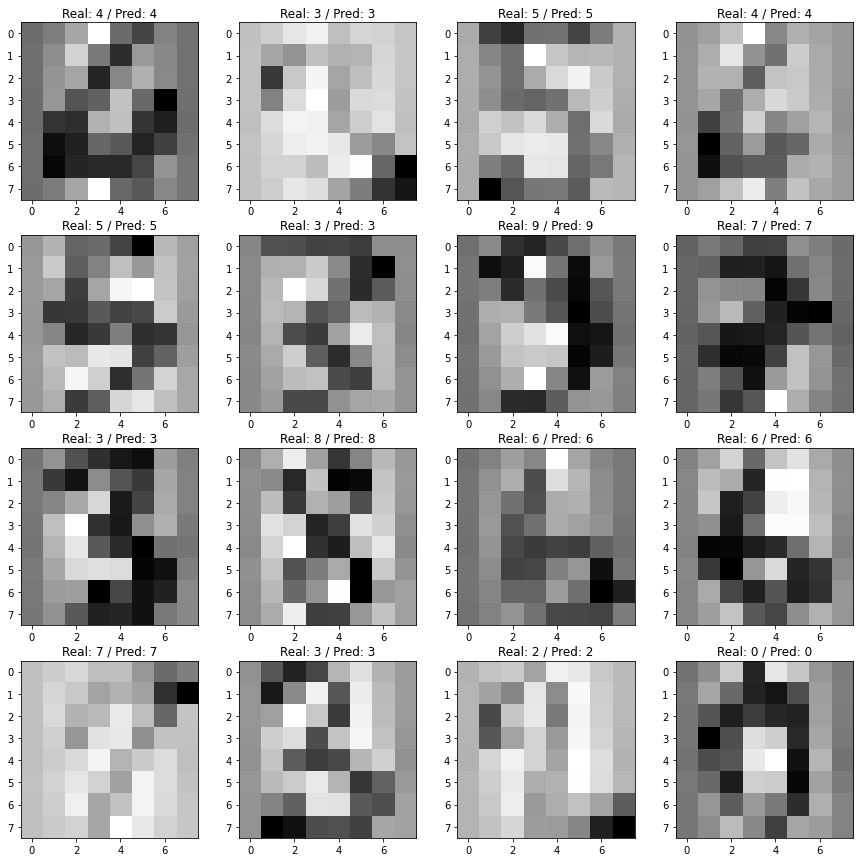

In [18]:
fig, axes = plt.subplots(4,4, figsize=(15,15))

for i,(idx, ax) in enumerate(zip(test_idx, axes.flatten())):
    ax.imshow(X[:,idx].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Real: {true_vals[i]} / Pred: {pred[i]}')